## Logistic Regression

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df=pd.read_csv("hearing_test.csv")
df.head()

,age,physical_score,test_result
0,33.000,40.700,1
1,50.000,37.200,1
2,52.000,24.700,0
3,56.000,31.000,0
4,35.000,42.900,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [7]:
df.test_result.value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

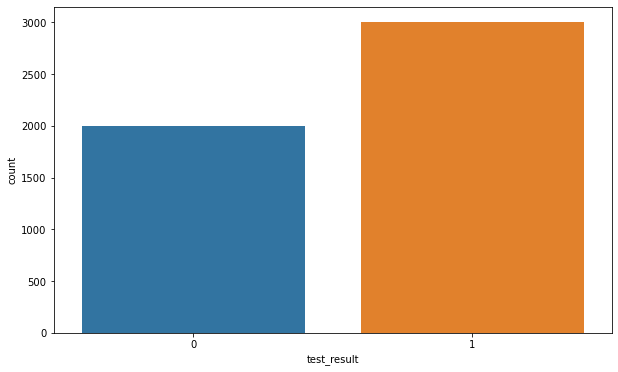

In [8]:
sns.countplot(df.test_result)

<AxesSubplot:xlabel='test_result', ylabel='age'>

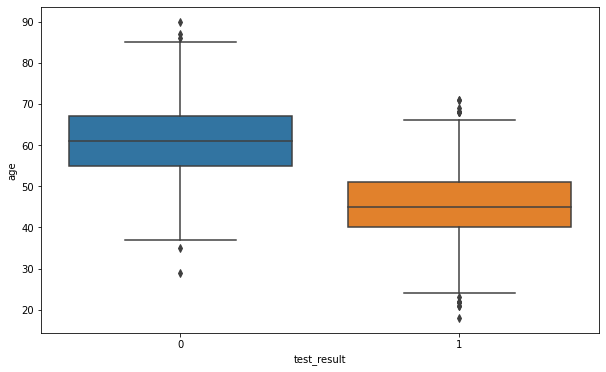

In [9]:
sns.boxplot(df.test_result, df.age)

In [10]:
df.columns

Index(['age', 'physical_score', 'test_result'], dtype='object')

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

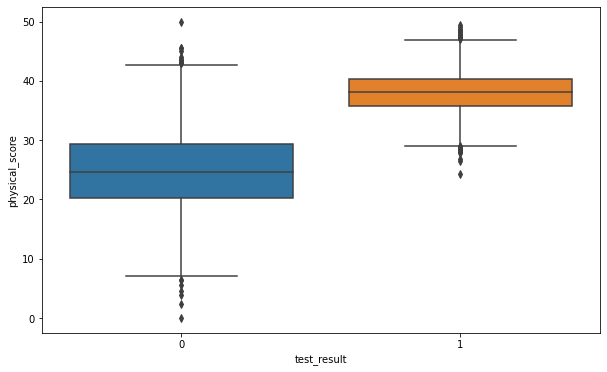

In [11]:
sns.boxplot(df.test_result, df.physical_score)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

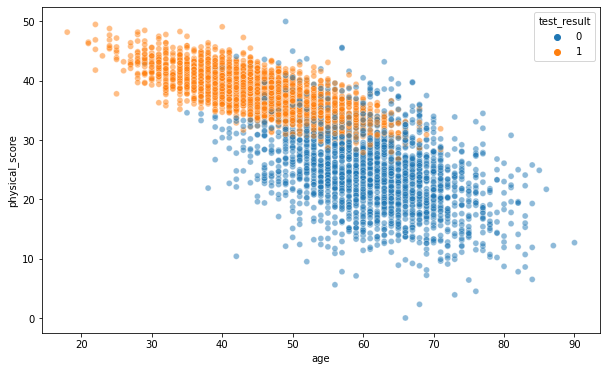

In [13]:
sns.scatterplot(df.age, df.physical_score, hue=df.test_result, alpha=0.5)

<AxesSubplot:>

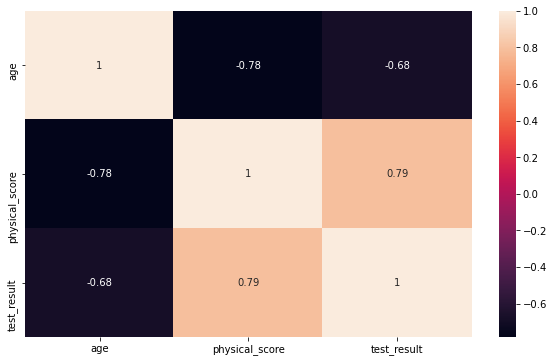

In [14]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

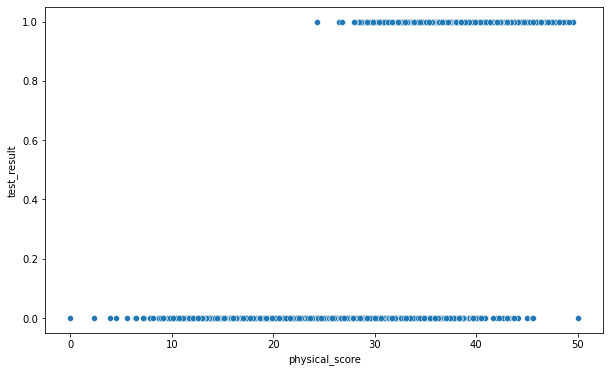

In [15]:
sns.scatterplot(df.physical_score, df.test_result)

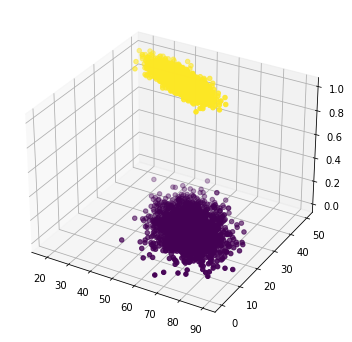

In [16]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result']);

In [17]:
X=df.drop("test_result", axis=1)
y=df.test_result

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.1, random_state=42)

In [20]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((4500, 2), (500, 2), (4500,), (500,))

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()

In [23]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log_model=LogisticRegression()

In [26]:
log_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [27]:
log_model.intercept_

array([0.47970588])

In [28]:
log_model.coef_

array([[-0.91841476,  3.52854047]])

In [29]:
df.head()

,age,physical_score,test_result
0,33.000,40.700,1
1,50.000,37.200,1
2,52.000,24.700,0
3,56.000,31.000,0
4,35.000,42.900,1


In [30]:
y_pred=log_model.predict(X_test_scaled)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,

In [31]:
y_pred_proba=log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[3.85772024e-02, 9.61422798e-01],
       [9.76936888e-01, 2.30631119e-02],
       [3.34205902e-02, 9.66579410e-01],
       [3.96264761e-03, 9.96037352e-01],
       [9.16652351e-01, 8.33476488e-02],
       [7.44755915e-01, 2.55244085e-01],
       [9.98059804e-01, 1.94019559e-03],
       [1.50614978e-01, 8.49385022e-01],
       [1.85211035e-01, 8.14788965e-01],
       [9.96440162e-01, 3.55983801e-03],
       [3.95696792e-01, 6.04303208e-01],
       [9.69371989e-01, 3.06280111e-02],
       [2.63170279e-02, 9.73682972e-01],
       [6.66051036e-02, 9.33394896e-01],
       [1.68923145e-01, 8.31076855e-01],
       [9.99204565e-01, 7.95434551e-04],
       [9.60525122e-02, 9.03947488e-01],
       [9.29050085e-01, 7.09499154e-02],
       [3.37535133e-02, 9.66246487e-01],
       [6.40896997e-01, 3.59103003e-01],
       [6.02791501e-01, 3.97208499e-01],
       [9.70332257e-01, 2.96677429e-02],
       [9.73441753e-01, 2.65582472e-02],
       [2.41999369e-01, 7.58000631e-01],
       [5.237137

In [32]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,age,physical_score,test_result
1501,55.000,39.700,0
2586,59.000,24.300,0
2653,42.000,37.600,1
1055,35.000,41.300,1
705,53.000,26.300,0
...,...,...,...
3928,58.000,31.100,1
544,44.000,37.400,1
367,59.000,22.600,0
1612,46.000,42.100,1


In [33]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,physical_score,test_result,pred_proba
1501,55.000,39.700,0,0.961
2586,59.000,24.300,0,0.023
2653,42.000,37.600,1,0.967
1055,35.000,41.300,1,0.996
705,53.000,26.300,0,0.083
...,...,...,...,...
3928,58.000,31.100,1,0.324
544,44.000,37.400,1,0.958
367,59.000,22.600,0,0.011
1612,46.000,42.100,1,0.993


In [34]:
test_data["pred"] = y_pred
test_data

,age,physical_score,test_result,pred_proba,pred
1501,55.000,39.700,0,0.961,1
2586,59.000,24.300,0,0.023,0
2653,42.000,37.600,1,0.967,1
1055,35.000,41.300,1,0.996,1
705,53.000,26.300,0,0.083,0
...,...,...,...,...,...
3928,58.000,31.100,1,0.324,0
544,44.000,37.400,1,0.958,1
367,59.000,22.600,0,0.011,0
1612,46.000,42.100,1,0.993,1


In [36]:
test_data.sample(10)

,age,physical_score,test_result,pred_proba,pred
3918,36.000,40.700,1,0.994,1
1335,54.000,29.400,0,0.242,0
296,32.000,41.100,1,0.997,1
3891,36.000,44.900,1,0.999,1
763,48.000,36.700,1,0.923,1
1741,49.000,42.000,1,0.991,1
2826,43.000,39.800,1,0.986,1
221,51.000,34.000,0,0.747,1
2882,70.000,26.400,0,0.023,0
3862,60.000,26.400,0,0.051,0


In [38]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [39]:
confusion_matrix(y_test,y_pred)

array([[161,  30],
       [ 17, 292]], dtype=int64)

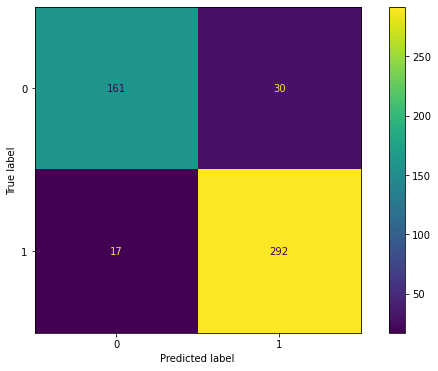

In [40]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

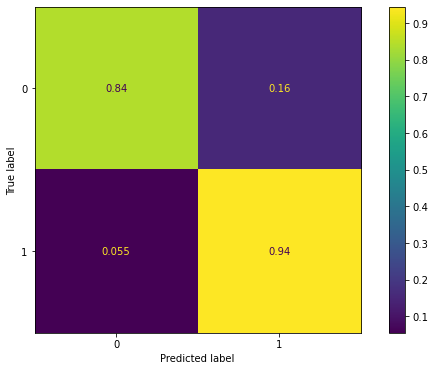

In [41]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='true');

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       191
           1       0.91      0.94      0.93       309

    accuracy                           0.91       500
   macro avg       0.91      0.89      0.90       500
weighted avg       0.91      0.91      0.91       500



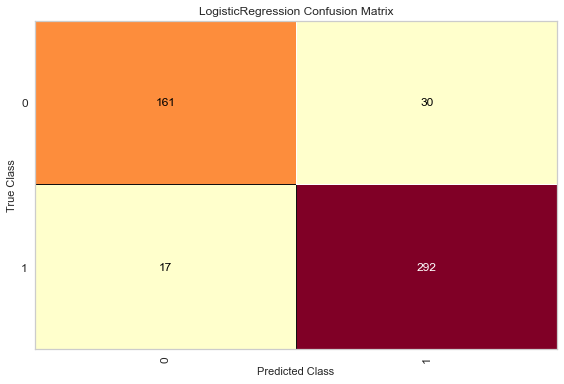

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [43]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(log_model)
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_scaled, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test_scaled, y_test)
cm.show()

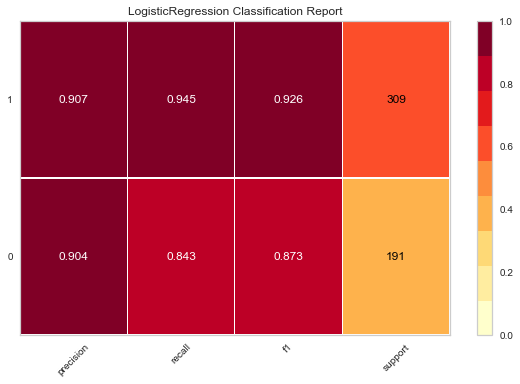

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [44]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(log_model, support=True)
visualizer.fit(X_train_scaled, y_train)        # Fit the visualizer and the model
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show()

In [45]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [46]:
accuracy_score(y_test,y_pred)

0.906

In [47]:
precision_score(y_test,y_pred)

0.906832298136646

In [48]:
from sklearn.model_selection import cross_val_score, cross_validate

In [49]:
model = LogisticRegression()

scores = cross_val_score(model, X_train_scaled, y_train, cv=10)
print('Cross-Validation Mean of Accuracy Scores', scores.mean())
print("")
print(scores)

Cross-Validation Mean of Accuracy Scores 0.9164444444444445

[0.88666667 0.92444444 0.90888889 0.91777778 0.89777778 0.91333333
 0.93555556 0.93111111 0.92       0.92888889]


In [50]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
1,0.026,0.008,0.887,0.886,0.887,0.887
2,0.022,0.009,0.924,0.924,0.924,0.924
3,0.034,0.013,0.909,0.909,0.909,0.909
4,0.025,0.009,0.918,0.918,0.918,0.918
5,0.022,0.009,0.898,0.898,0.898,0.897
6,0.018,0.018,0.913,0.916,0.913,0.912
7,0.018,0.006,0.936,0.936,0.936,0.935
8,0.018,0.006,0.931,0.933,0.931,0.930
9,0.013,0.010,0.920,0.921,0.920,0.919
10,0.014,0.006,0.929,0.929,0.929,0.929


In [51]:
df_scores.mean()[2:]

test_accuracy             0.916
test_precision_weighted   0.917
test_recall_weighted      0.916
test_f1_weighted          0.916
dtype: float64

In [52]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

In [53]:
log_model

LogisticRegression()

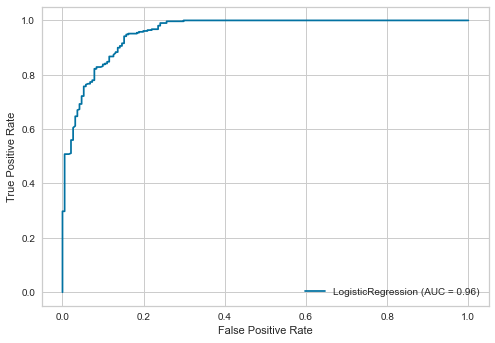

In [54]:
plot_roc_curve(log_model, X_test_scaled, y_test, response_method='auto');

In [55]:
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])

In [56]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.4901380920087934

In [59]:
roc_curve = {"fp_rate":fp_rate, "tp_rate":tp_rate, "thresholds":thresholds}
df_roc_curve = pd.DataFrame(roc_curve)
df_roc_curve

,fp_rate,tp_rate,thresholds
0,0.000,0.000,2.000
1,0.000,0.003,1.000
2,0.000,0.016,1.000
3,0.000,0.023,0.999
4,0.000,0.091,0.997
...,...,...,...
112,0.555,1.000,0.024
113,0.565,1.000,0.024
114,0.602,1.000,0.017
115,0.613,1.000,0.017


In [60]:
optimal_idx = np.argmax(df_roc_curve.tp_rate - df_roc_curve.fp_rate)
optimal_threshold = df_roc_curve.thresholds[optimal_idx]
optimal_threshold

0.4901380920087934

In [61]:
df_roc_curve.iloc[optimal_idx]

fp_rate      0.157
tp_rate      0.948
thresholds   0.490
Name: 85, dtype: float64